In [29]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [30]:
data =pd.read_csv('C:/Users/MBAKOP Loic/Documents/Machine Learning Python/des-fichiers-complementaires-4-335-ko/Chapitre_07/Data/ozone.csv',sep=',')



In [31]:
y = data["MaxO3"]

In [32]:
data = data[
    ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
            'Vx12', 'Vx15', 'MaxO3v']
]

In [33]:
data

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
0,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...
107,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76
108,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71
109,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77
110,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99


In [34]:
data.describe()

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429
std,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853
min,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000
25%,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000
50%,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000
75%,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000
max,27.000000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,5.000000,166.000000


In [35]:
def normalization(dataToNormalize):
    columns = dataToNormalize.columns
    for col in columns:
        x=dataToNormalize[[col]].values.astype(float)
        standart_normalization = preprocessing.StandardScaler()
        res = standart_normalization.fit_transform(x)
        dataToNormalize[[col]] = res
        
normalization(data)
        

In [36]:
data

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
0,-0.888045,-0.752140,-0.937279,-0.359451,-0.448069,1.365152,0.728338,-0.035606,0.356046,-0.233441
1,-0.437704,-0.776989,-1.092469,0.027650,-0.007861,0.934456,-1.188782,-0.858374,-0.468010,-0.126870
2,-0.984547,-0.975785,-0.693408,-1.133653,-0.007861,-0.357631,1.590540,1.254113,0.790522,-0.304488
3,-0.695042,-0.453946,-0.028306,-1.520753,-1.768695,-2.080415,0.839060,0.703625,0.542276,0.050748
4,-0.309035,-0.255151,-0.493878,1.188953,1.312765,0.934456,0.272551,-0.482687,-0.943449,0.832266
...,...,...,...,...,...,...,...,...,...,...
107,-1.627892,-0.950935,-1.070299,-0.746552,-0.007861,0.503760,0.463320,0.219536,0.144795,-0.517629
108,-0.695042,-0.180602,-0.116987,0.414751,-0.007861,0.073064,0.198303,-0.139768,0.115306,-0.695247
109,-0.469871,0.366086,-0.006136,0.414751,-0.448069,0.934456,1.035629,0.890786,0.914663,-0.482105
110,-0.469871,-0.429097,-0.116987,0.414751,-0.007861,-0.788327,-1.062836,-0.771710,-0.825457,0.299413


In [37]:
data.describe()

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,-6.215266e-16,-2.111406e-16,3.568574e-17,-1.040834e-16,-1.179612e-16,-1.675247e-16,3.419883e-17,1.239088e-17,-8.524927e-17,6.046750e-17
std,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00
min,-2.271236e+00,-1.870365e+00,-1.713231e+00,-1.907854e+00,-2.208904e+00,-2.080415e+00,-2.542636e+00,-2.251932e+00,-2.612687e+00,-1.725430e+00
25%,-6.950420e-01,-7.272901e-01,-7.432910e-01,-7.465517e-01,-4.480695e-01,-7.883274e-01,-7.867737e-01,-7.019695e-01,-8.037238e-01,-6.952468e-01
50%,-1.803663e-01,-2.427259e-01,-1.280717e-01,4.147509e-01,-7.860868e-03,7.306449e-02,1.329075e-01,-9.643571e-02,5.041172e-02,-2.867259e-01
75%,5.031874e-01,5.027576e-01,6.146254e-01,8.018518e-01,8.725563e-01,9.344564e-01,7.283376e-01,5.788388e-01,6.043282e-01,5.480777e-01
max,2.779019e+00,2.975278e+00,2.853802e+00,1.188953e+00,1.312765e+00,1.365152e+00,2.445874e+00,2.942264e+00,2.391559e+00,2.679491e+00


In [38]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [39]:
regression_alg = LinearRegression()

In [40]:
regression_alg.fit(x_train,y_train)

LinearRegression()

In [41]:
train_predictions = regression_alg.predict(x_train)
print (f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),2)}")

print (f"R2_score = {round(r2_score(y_train,train_predictions),2)}")

RMSE = 14.23
R2_score = 0.76


In [42]:
test_predictions = regression_alg.predict(x_test)
print (f"RMSE = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print (f"R2_score = {round(r2_score(y_test,test_predictions),2)}")

RMSE = 11.59
R2_score = 0.79


In [43]:
regression_alg.coef_

array([ 0.11521181,  9.77624168,  0.84143865, -6.46264323, -0.37313622,
        0.31394037,  4.26137073, -0.06150964,  0.91056124,  9.73119429])

In [44]:
regression_alg.intercept_

90.90640368943308

<function matplotlib.pyplot.show(close=None, block=None)>

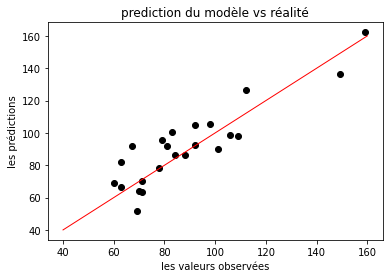

In [45]:
plt.scatter(y_test,test_predictions,color='black')
plt.title("prediction du modèle vs réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show

In [46]:
def average_result(nb_run):
    average_rmse = 0
    average_r2 = 0
    for i_run in range(nb_run):
        x_train,x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
        
        regression_alg = LinearRegression()
        regression_alg.fit(x_train,y_train)
        
        test_predictions = regression_alg.predict(x_test)
        
        i_run_rmse = sqrt(mean_squared_error(y_test,test_predictions))
        i_run_r_2 = r2_score(y_test,test_predictions)
        
        print(f"Run {i_run}: RMSE = {round (i_run_rmse,2)} - R2_score = {round(i_run_r_2,2)}")
        
        average_rmse += i_run_rmse
        average_r2+= i_run_r_2
        
        
    average_rmse = average_rmse/nb_run
    average_r2 = average_r2/nb_run
    
    
    print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")
   
        
        

In [47]:
average_result(10)

Run 0: RMSE = 18.51 - R2_score = 0.65
Run 1: RMSE = 13.28 - R2_score = 0.84
Run 2: RMSE = 12.96 - R2_score = 0.84
Run 3: RMSE = 13.59 - R2_score = 0.82
Run 4: RMSE = 19.4 - R2_score = 0.7
Run 5: RMSE = 11.65 - R2_score = 0.82
Run 6: RMSE = 11.33 - R2_score = 0.87
Run 7: RMSE = 15.08 - R2_score = 0.76
Run 8: RMSE = 17.25 - R2_score = 0.62
Run 9: RMSE = 17.01 - R2_score = 0.73
Moyenne : RMSE = 15.01 - R2_score = 0.76


In [48]:
from sklearn.model_selection import KFold

In [49]:
kf = KFold(n_splits=2, shuffle=False)

In [50]:
for train_index, test_index in kf.split(data):
    print("Les indices de train_index = ", train_index)
    print("Les indices de test_index = ",test_index)
    print("\n\n")
    

Les indices de train_index =  [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Les indices de test_index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]



Les indices de train_index =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Les indices de test_index =  [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]





In [51]:
kf = KFold(n_splits=2, shuffle=True)
for train_index, test_index in kf.split(data):
    print("Les indices de train_index = ", train_index)
    print("Les indices de test_index = ",test_index)
    print("\n\n")
    

Les indices de train_index =  [  1   3   6   8   9  10  12  13  15  16  17  19  20  21  23  26  27  28
  31  32  36  37  45  46  50  52  54  56  58  60  61  64  65  68  70  72
  74  77  78  79  83  84  89  90  91  94  98 101 102 104 105 106 107 108
 109 110]
Les indices de test_index =  [  0   2   4   5   7  11  14  18  22  24  25  29  30  33  34  35  38  39
  40  41  42  43  44  47  48  49  51  53  55  57  59  62  63  66  67  69
  71  73  75  76  80  81  82  85  86  87  88  92  93  95  96  97  99 100
 103 111]



Les indices de train_index =  [  0   2   4   5   7  11  14  18  22  24  25  29  30  33  34  35  38  39
  40  41  42  43  44  47  48  49  51  53  55  57  59  62  63  66  67  69
  71  73  75  76  80  81  82  85  86  87  88  92  93  95  96  97  99 100
 103 111]
Les indices de test_index =  [  1   3   6   8   9  10  12  13  15  16  17  19  20  21  23  26  27  28
  31  32  36  37  45  46  50  52  54  56  58  60  61  64  65  68  70  72
  74  77  78  79  83  84  89  90  91  94  98 1

In [52]:
kf = KFold(n_splits=3, shuffle=False)
for train_index, test_index in kf.split(data):
    print(f"Le nombre d'éléments dans train_index = {train_index.shape[0]}")
    print(f"Le nombre d'éléments dans test_index = {test_index.shape[0]}\n")
    

Le nombre d'éléments dans train_index = 74
Le nombre d'éléments dans test_index = 38

Le nombre d'éléments dans train_index = 75
Le nombre d'éléments dans test_index = 37

Le nombre d'éléments dans train_index = 75
Le nombre d'éléments dans test_index = 37



In [53]:
def create_evaluate_model(index_fold,x_train,x_test,y_train,y_test):
    regression_alg = LinearRegression()
    regression_alg.fit(x_train,y_train)
    test_predictions = regression_alg.predict(x_test)
    
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    print(f"Run {index_fold} : RMSE = {round(rmse,2)} - R2_score = {round(r2,2)}")
    return (rmse, r2)

In [56]:
nb_model =5
kf = KFold(nb_model,shuffle=False)
index_fold = 0
average_rmse = 0
average_r2 = 0
for train_index,test_index in kf.split(data):
    print(f"Le nombre d'éléments dans train_index = {train_index.shape[0]}")
    print(f"Le nombre d'éléments dans test_index = {test_index.shape[0]}\n")
    x_train, x_test = data.iloc[train_index], data.iloc[test_index]
        
    y_train, y_test = y[train_index], y[test_index]
    current_rmse, current_r2 = create_evaluate_model(index_fold, x_train, x_test, y_train, y_test)
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    index_fold = index_fold + 1
    
average_rmse = average_rmse / nb_model
average_r2 = average_r2 / nb_model
print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")

Le nombre d'éléments dans train_index = 89
Le nombre d'éléments dans test_index = 23

Run 0 : RMSE = 15.25 - R2_score = 0.55
Le nombre d'éléments dans train_index = 89
Le nombre d'éléments dans test_index = 23

Run 1 : RMSE = 18.13 - R2_score = 0.2
Le nombre d'éléments dans train_index = 90
Le nombre d'éléments dans test_index = 22

Run 2 : RMSE = 19.2 - R2_score = 0.74
Le nombre d'éléments dans train_index = 90
Le nombre d'éléments dans test_index = 22

Run 3 : RMSE = 16.31 - R2_score = 0.68
Le nombre d'éléments dans train_index = 90
Le nombre d'éléments dans test_index = 22

Run 4 : RMSE = 8.4 - R2_score = 0.62
Moyenne : RMSE = 15.46 - R2_score = 0.56
